In [85]:
#load in csv files as dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#load in csv files as dataframes
Tournament_df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Data Collection/PokeAPI/Combined_Teams_2024.csv')
Moves_df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Data Collection/PokeAPI/moves.csv')
Pokemon_df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Data Collection/PokeAPI/pokemon.csv')

In [86]:
Pokemon_df
#add in an id column to the pokemon dataframe
Pokemon_df['id'] = Pokemon_df.index + 1
#add in the generation of the pokemon to the dataframe. For pokmeon 1-151, the generation is 1, for 152-251, the generation is 2, for 252-386, the generation is 3, for 387-493, the generation is 4, for 494-649, the generation is 5, for 650-721, the generation is 6, for 722-809, the generation is 7, for 810-905, the generation is 8 and for 905-1025, the generation is 9
Pokemon_df['generation'] = np.where(Pokemon_df['id'] <= 151, 1, np.where(Pokemon_df['id'] <= 251, 2, np.where(Pokemon_df['id'] <= 386, 3, np.where(Pokemon_df['id'] <= 493, 4, np.where(Pokemon_df['id'] <= 649, 5, np.where(Pokemon_df['id'] <= 721, 6, np.where(Pokemon_df['id'] <= 809, 7, np.where(Pokemon_df['id'] <= 905, 8, 9))))))))
Pokemon_df['pokemon'] = Pokemon_df['pokemon'].str.strip().str.lower()
# create a new column titled stat_total that is the sum of the base stats of each pokemon
Pokemon_df['stat_total'] = Pokemon_df['hp'] + Pokemon_df['attack'] + Pokemon_df['defense'] + Pokemon_df['special_attack'] + Pokemon_df['special_defense'] + Pokemon_df['speed']
Pokemon_df

,pokemon,ability_one,ability_two,ability_three,height,weight,moves,num_moves,hp,attack,defense,special_attack,special_defense,speed,type_one,type_two,id,generation,stat_total
0,bulbasaur,overgrow,chlorophyll,NaN,7,69,"['razor-wind', 'swords-dance', 'cut', 'bind', ...",86,45,49,49,65,65,45,grass,poison,1,1,318
1,ivysaur,overgrow,chlorophyll,NaN,10,130,"['swords-dance', 'cut', 'bind', 'vine-whip', '...",83,60,62,63,80,80,60,grass,poison,2,1,405
2,venusaur,overgrow,chlorophyll,NaN,20,1000,"['swords-dance', 'cut', 'bind', 'vine-whip', '...",96,80,82,83,100,100,80,grass,poison,3,1,525
3,charmander,blaze,solar-power,NaN,6,85,"['mega-punch', 'fire-punch', 'thunder-punch', ...",105,39,52,43,60,50,65,fire,NaN,4,1,309
4,charmeleon,blaze,solar-power,NaN,11,190,"['mega-punch', 'fire-punch', 'thunder-punch', ...",103,58,64,58,80,65,80,fire,NaN,5,1,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,raging-bolt,protosynthesis,NaN,NaN,52,4800,"['stomp', 'body-slam', 'take-down', 'double-ed...",55,125,73,91,137,89,75,electric,dragon,1021,9,590
1021,iron-boulder,quark-drive,NaN,NaN,15,1625,"['swords-dance', 'horn-attack', 'body-slam', '...",49,90,120,80,68,108,124,rock,psychic,1022,9,590
1022,iron-crown,quark-drive,NaN,NaN,16,1560,"['swords-dance', 'body-slam', 'take-down', 'do...",49,90,72,100,122,108,98,steel,psychic,1023,9,590
1023,terapagos,tera-shift,NaN,NaN,2,65,"['headbutt', 'body-slam', 'take-down', 'double...",59,90,65,85,65,85,60,normal,NaN,1024,9,450


In [87]:
#show ogerpon 
Pokemon_df[Pokemon_df['pokemon'] == 'ogerpon']


,pokemon,ability_one,ability_two,ability_three,height,weight,moves,num_moves,hp,attack,defense,special_attack,special_defense,speed,type_one,type_two,id,generation,stat_total
1016,ogerpon,defiant,NaN,NaN,12,398,"['swords-dance', 'slam', 'vine-whip', 'double-...",62,80,120,84,60,96,110,grass,NaN,1017,9,550


In [88]:
# for each column make the first letter in each element lowercase
Tournament_df.columns = Tournament_df.columns.str.lower()
#for each column make the first letter in each row lowercase
Tournament_df['pokemon'] = Tournament_df['pokemon'].str.lower()
Tournament_df['item'] = Tournament_df['item'].str.lower()
Tournament_df['ability'] = Tournament_df['ability'].str.lower()
Tournament_df['tera type'] = Tournament_df['tera type'].str.lower()
Tournament_df['move 1'] = Tournament_df['move 1'].str.lower()
Tournament_df['move 2'] = Tournament_df['move 2'].str.lower()
Tournament_df['move 3'] = Tournament_df['move 3'].str.lower()
Tournament_df['move 4'] = Tournament_df['move 4'].str.lower()
Tournament_df['tournament'] = Tournament_df['tournament'].str.lower()

Tournament_df['pokemon'] = Tournament_df['pokemon'].str.strip().str.lower()
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'generation']], on='pokemon', how='left')
#any nan values in generation replace with 9
Tournament_df['generation'] = Tournament_df['generation'].fillna(9)

#on the tera type column, remove any spaces
Tournament_df['tera type'] = Tournament_df['tera type'].str.replace(' ', '')
Tournament_df

,pokemon,item,ability,tera type,move 1,move 2,move 3,move 4,rank,wins,losses,tournament,generation
0,miraidon,choice specs,hadron engine,fairy,electro drift,draco meteor,dazzling gleam,volt switch,1,9,2,worlds,9.0
1,ogerponhearthflame,hearthflame mask,mold breaker,fire,spiky shield,ivy cudgel,wood hammer,follow me,1,9,2,worlds,9.0
2,urshifurapidstrike,focus sash,unseen fist,water,detect,surging strikes,close combat,aqua jet,1,9,2,worlds,9.0
3,iron hands,assault vest,quark drive,bug,drain punch,wild charge,fake out,low kick,1,9,2,worlds,9.0
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light screen,tailwind,1,9,2,worlds,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,pelipper,focus sash,drizzle,ghost,protect,wide guard,hurricane,weather ball,252,5,4,north america international,3.0
4448,gholdengo,life orb,good as gold,normal,protect,nasty plot,make it rain,shadow ball,252,5,4,north america international,9.0
4449,grimmsnarl,light clay,prankster,dark,reflect,light screen,thunder wave,foul play,252,5,4,north america international,8.0
4450,urshifurapidstrike,choice scarf,unseen fist,grass,coaching,close combat,surging strikes,uturn,252,5,4,north america international,9.0


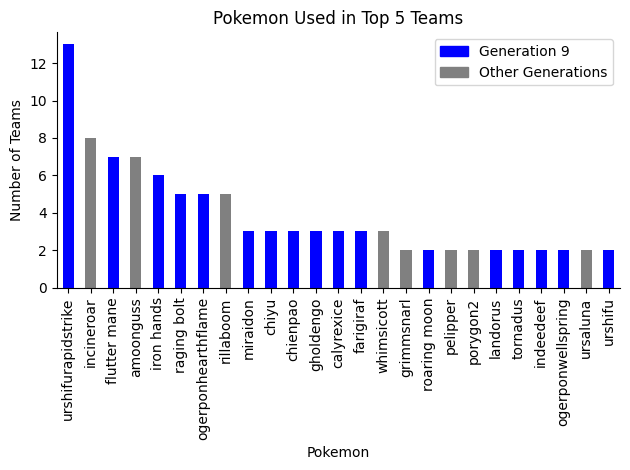

In [89]:
# Filter the top 5 ranked teams
Top5_df = Tournament_df.loc[Tournament_df['rank'] <= 5]

# Get pokemon used on more than 1 team
pokemon_counts = Top5_df['pokemon'].value_counts().loc[lambda x: x > 1]

# Check which pokemon belong to generation 9
is_gen_9 = pokemon_counts.index.isin(Top5_df[Top5_df['generation'] == 9]['pokemon'])

# Plot the bar chart with color coding
pokemon_counts.plot(kind='bar', color=np.where(is_gen_9, 'blue', 'grey'))

# Create custom legend patches
legend_handles = [
    mpatches.Patch(color='blue', label='Generation 9'),
    mpatches.Patch(color='grey', label='Other Generations')
]

# Add the custom legend
plt.legend(handles=legend_handles, loc='upper right')

# Label axes and title
plt.xlabel('Pokemon')
plt.ylabel('Number of Teams')
plt.title('Pokemon Used in Top 5 Teams')

# Remove the box around the plot
sns.despine()
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Pokemon_Used_Top_5_Teams.png')


# Show the plot
plt.show()




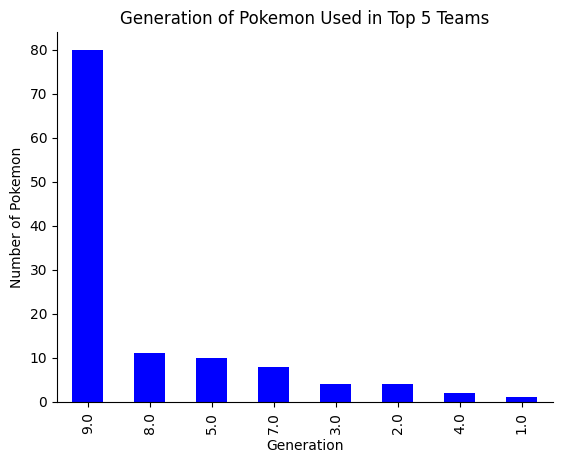

In [90]:
#show the distribution of the generations of pokemon used in the top 5 teams
Top5_df['generation'].value_counts().plot(kind='bar', color = 'blue')
plt.title('Generation of Pokemon Used in Top 5 Teams')
plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')
#remove the box around the plot
sns.despine()
plt.show()


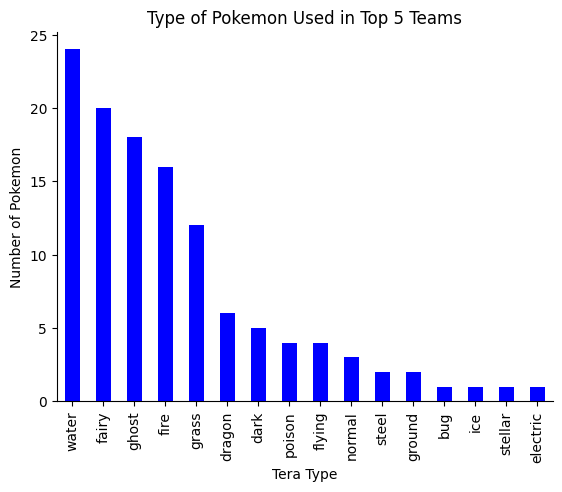

In [91]:
#show the distribution of pokemon types used in the top 5 teams
Top5_df['tera type'].value_counts().plot(kind='bar', color = 'blue')
plt.title('Type of Pokemon Used in Top 5 Teams')
plt.xlabel('Tera Type')
plt.ylabel('Number of Pokemon')
#remove the box around the plot
sns.despine()
plt.show()



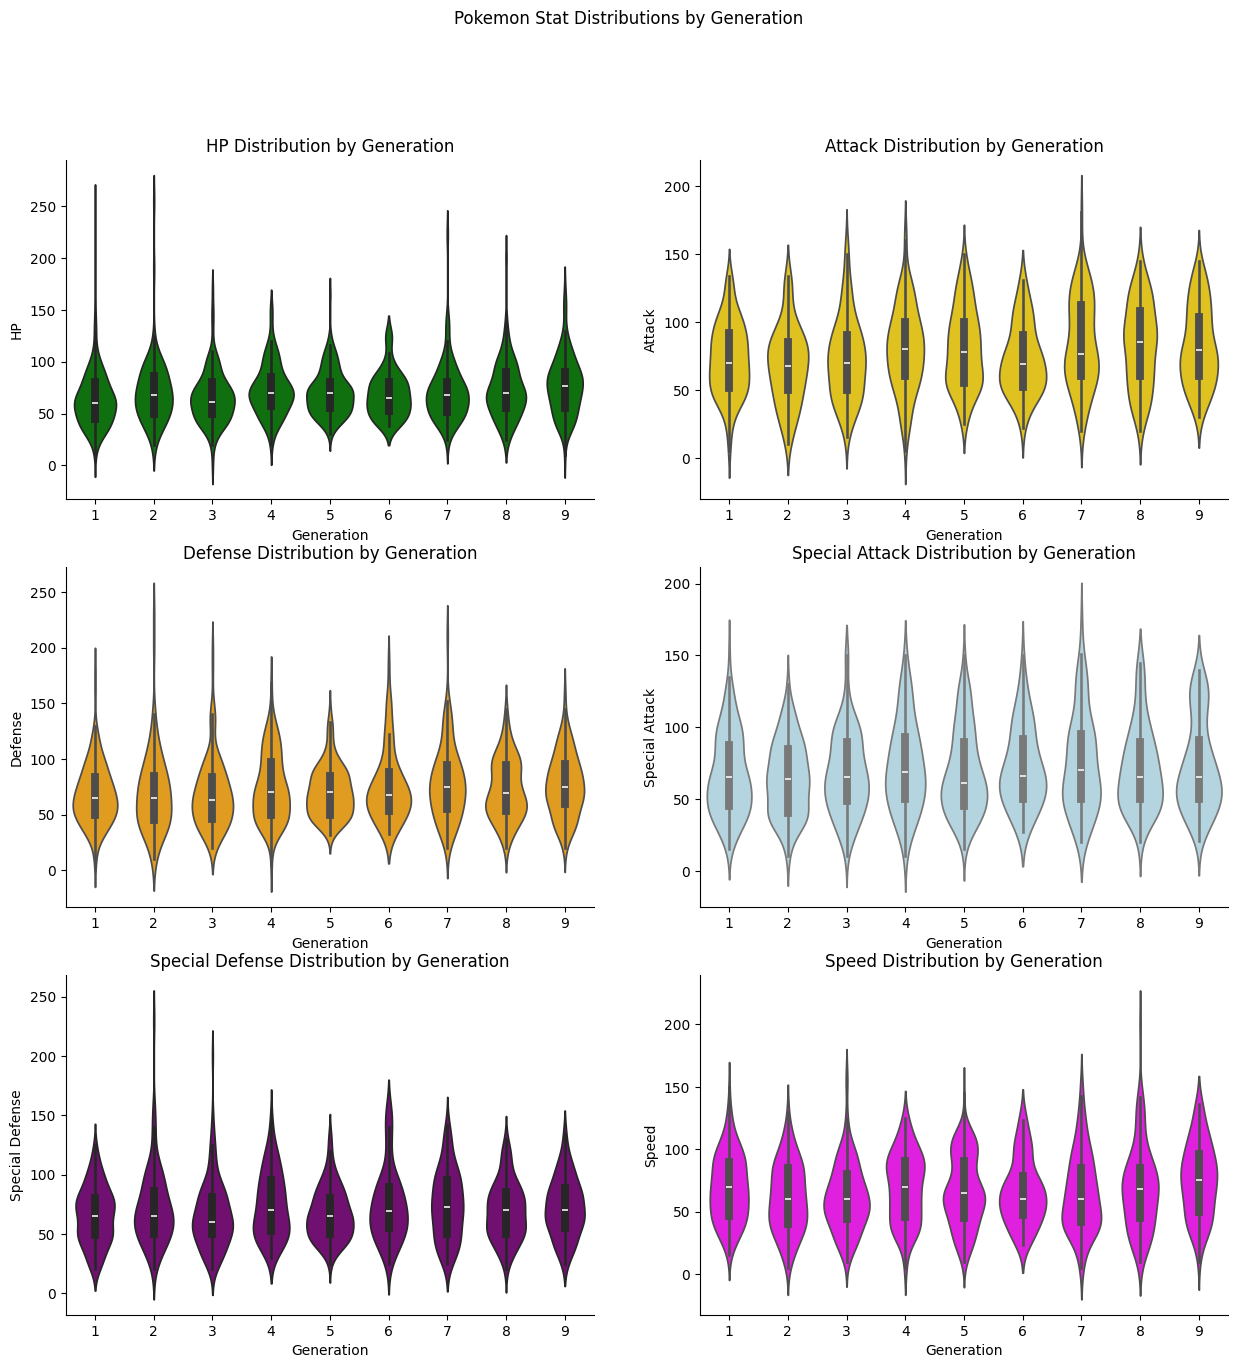

In [92]:
#plot these six violin plots in one figure with a title for each plot
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Pokemon Stat Distributions by Generation')
sns.violinplot(x='generation', y='hp', data=Pokemon_df, color='Green', ax=axs[0, 0])
axs[0, 0].set_title('HP Distribution by Generation')
axs[0, 0].set(xlabel='Generation', ylabel='HP')
#remove the box around the plot
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='attack', data=Pokemon_df, color='gold', ax=axs[0, 1])
axs[0, 1].set_title('Attack Distribution by Generation')
axs[0, 1].set(xlabel='Generation', ylabel='Attack')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='defense', data=Pokemon_df, color='orange', ax=axs[1, 0])
axs[1, 0].set_title('Defense Distribution by Generation')
axs[1, 0].set(xlabel='Generation', ylabel='Defense')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='special_attack', data=Pokemon_df, color = 'lightblue', ax=axs[1, 1])
axs[1, 1].set_title('Special Attack Distribution by Generation')
axs[1, 1].set(xlabel='Generation', ylabel='Special Attack')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='special_defense', data=Pokemon_df, color='purple', ax=axs[2, 0])
axs[2, 0].set_title('Special Defense Distribution by Generation')
axs[2, 0].set(xlabel='Generation', ylabel='Special Defense')
axs[2, 0].spines['top'].set_visible(False)
axs[2, 0].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='speed', data=Pokemon_df, color='magenta', ax=axs[2, 1])
axs[2, 1].set_title('Speed Distribution by Generation')
axs[2, 1].set(xlabel='Generation', ylabel='Speed')
axs[2, 1].spines['top'].set_visible(False)
axs[2, 1].spines['right'].set_visible(False)
plt.show()

In [93]:
#calculate the median of hp, attack, defense, special attack, special defense and speed for each generation
mean_stats = Pokemon_df.groupby('generation')[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].mean()
mean_stats


,hp,attack,defense,special_attack,special_defense,speed
generation,,,,,,
1,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
2,70.980000,68.260000,69.690000,64.500000,72.340000,61.410000
3,65.666667,73.111111,69.007407,67.859259,66.466667,61.614815
4,73.102804,80.214953,75.112150,73.280374,74.383178,69.476636
5,70.314103,81.032051,71.237179,69.243590,67.333333,66.596154
6,68.916667,72.500000,75.083333,72.541667,74.583333,65.680556
7,71.011364,84.772727,78.727273,74.954545,74.568182,65.375000
8,72.822917,82.906250,73.281250,71.645833,69.614583,68.947917
9,77.391667,82.425000,76.783333,72.866667,72.475000,75.450000


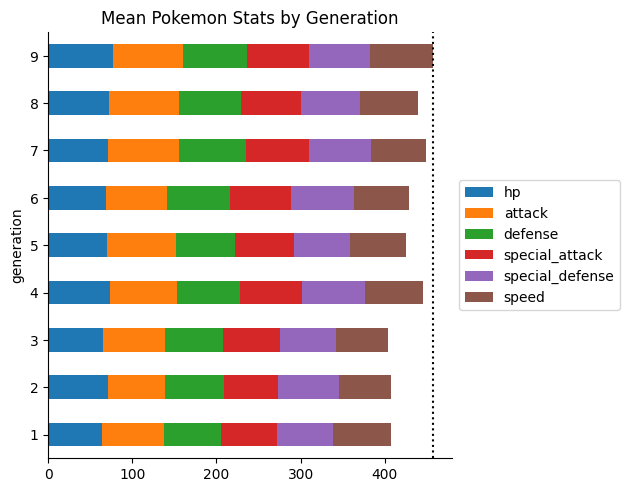

In [104]:
#change the plot to be a horizontal stacked bar chart
#plot the stacked bar chart
mean_stats.plot(kind='barh', stacked=True)
#move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#remove the box around the plot
sns.despine()
plt.tight_layout()
plt.title('Mean Pokemon Stats by Generation')
#add in a dotted line at the end of generation 9 going down the plot
plt.axvline(x=mean_stats.loc[9].sum(), color='black', linestyle='dotted')
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Mean_Pokemon_Stats_by_Generation.png',bbox_inches='tight')


In [95]:
#create a new dataframe with that removes the bottom 20% of pokemon by stat total by generation and the top 20% of pokemon by stat total by generation
top25 = Pokemon_df.groupby('generation')['stat_total'].quantile(0.75)

top25 = top25.reset_index()
top25.columns = ['generation', 'top25']

#create a new dataframe with only the top 25% of pokemon by stat total by generation
top25_df = Pokemon_df.merge(top25, on='generation', how='left')
top25_df = top25_df[top25_df['stat_total'] >= top25_df['top25']]






In [96]:
#calculate the median of hp, attack, defense, special attack, special defense and speed for each generation
top25_mean_stats = top25_df.groupby('generation')[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].mean()


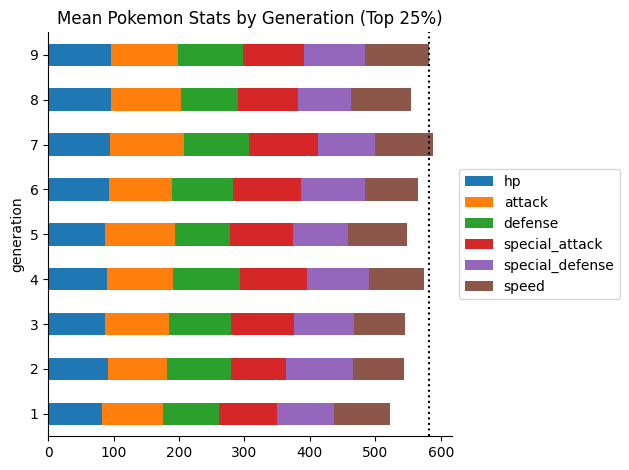

In [105]:
#Create a horizontal stacked bar chart of the median stats for each generation
top25_mean_stats.plot(kind='barh', stacked=True)
#move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#remove the box around the plot
sns.despine()
plt.title('Mean Pokemon Stats by Generation (Top 25%)')
plt.tight_layout()
#add in a dotted line at the end of generation 9 going down the plot
plt.axvline(x=top25_mean_stats.loc[9].sum(), color='black', linestyle='dotted')
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Top25_Mean_Pokemon_Stats_by_Generation.png')
plt.show()


In [98]:
Moves_df
#in the generation column, remove the word generation and the - from the string
Moves_df['generation'] = Moves_df['generation'].str.replace('generation', '')
Moves_df['generation'] = Moves_df['generation'].str.replace('-', '')
#in the generation column, replace the roman numeral with the corresponding number
Moves_df['generation'] = Moves_df['generation'].replace('i', 1)
Moves_df['generation'] = Moves_df['generation'].replace('ii', 2)
Moves_df['generation'] = Moves_df['generation'].replace('iii', 3)
Moves_df['generation'] = Moves_df['generation'].replace('iv', 4)
Moves_df['generation'] = Moves_df['generation'].replace('v', 5)
Moves_df['generation'] = Moves_df['generation'].replace('vi', 6)
Moves_df['generation'] = Moves_df['generation'].replace('vii', 7)
Moves_df['generation'] = Moves_df['generation'].replace('viii', 8)
Moves_df['generation'] = Moves_df['generation'].replace('ix', 9)
Moves_df

,name,damage_class,type,power,accuracy,pp,priority,target,effect,effect_chance,pokemon,pokemon_count,generation,meta,machines_count,machines
0,pound,physical,normal,40.0,100.0,35,0,selected-pokemon,Inflicts regular damage.,NaN,"clefairy, clefable, jigglypuff, wigglytuff, po...",102,1,damage,0,NaN
1,karate-chop,physical,fighting,50.0,100.0,25,0,selected-pokemon,Inflicts regular damage. User's critical hit ...,NaN,"mankey, primeape, machop, machoke, machamp, el...",11,1,damage,0,NaN
2,double-slap,physical,normal,15.0,85.0,10,0,selected-pokemon,Inflicts regular damage. Hits 2–5 times in on...,NaN,"clefairy, clefable, jigglypuff, wigglytuff, po...",43,1,damage,0,NaN
3,comet-punch,physical,normal,18.0,85.0,15,0,selected-pokemon,Inflicts regular damage. Hits 2–5 times in on...,NaN,"hitmonchan, kangaskhan, ledyba, ledian, timbur...",9,1,damage,0,NaN
4,mega-punch,physical,normal,80.0,85.0,20,0,selected-pokemon,Inflicts regular damage.,NaN,"charmander, charmeleon, charizard, squirtle, w...",231,1,damage,2,"sword-shield, red-blue, yellow"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,temper-flare,physical,fire,75.0,100.0,10,0,selected-pokemon,NaN,NaN,"charmander, charmeleon, charizard, growlithe, ...",74,9,NaN,1,"scarlet-violet, the-indigo-disk"
915,supercell-slam,physical,electric,100.0,95.0,15,0,selected-pokemon,NaN,NaN,"electrode, rhyhorn, rhydon, electabuzz, snorla...",47,9,NaN,1,"scarlet-violet, the-indigo-disk"
916,psychic-noise,special,psychic,75.0,100.0,10,0,selected-pokemon,NaN,NaN,"jigglypuff, wigglytuff, venonat, venomoth, psy...",77,9,NaN,1,"scarlet-violet, the-indigo-disk"
917,upper-hand,physical,fighting,65.0,100.0,15,3,selected-pokemon,NaN,NaN,"pikachu, raichu, poliwrath, hitmonlee, hitmonc...",63,9,NaN,1,"scarlet-violet, the-indigo-disk"


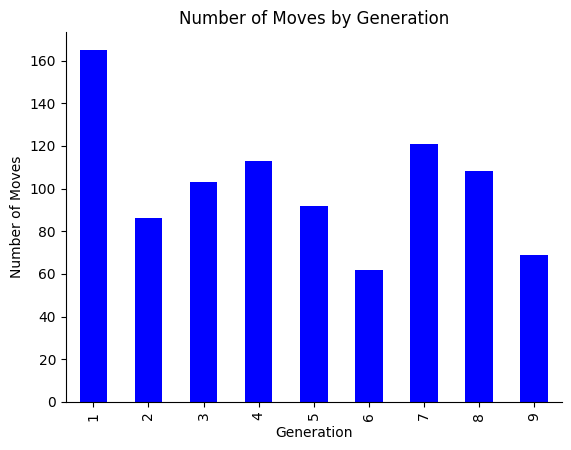

In [99]:
#for each generation, count the number of moves
generation_counts = Moves_df['generation'].value_counts()
generation_counts = generation_counts.sort_index()
generation_counts.plot(kind='bar', color='blue')
plt.title('Number of Moves by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Moves')
#remove the box around the plot
sns.despine()
plt.show()


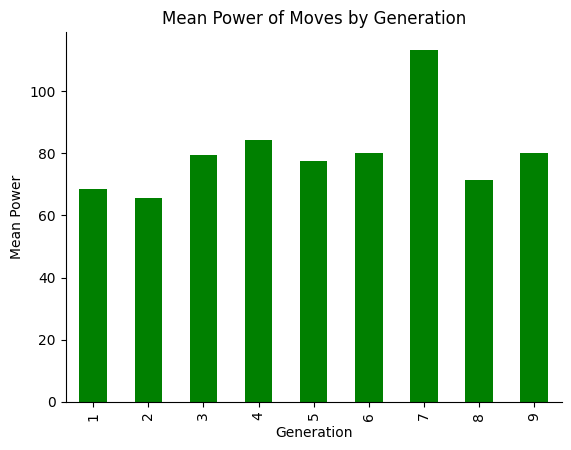

In [100]:
#for each generation, get the mean power of the moves filtered by moves that have a power greater than 0
generation_power = Moves_df[Moves_df['power'] > 0].groupby('generation')['power'].mean()
generation_power = generation_power.sort_index()
generation_power.plot(kind='bar', color='green')
plt.title('Mean Power of Moves by Generation')
plt.xlabel('Generation')
plt.ylabel('Mean Power')
#remove the box around the plot
sns.despine()
plt.show()



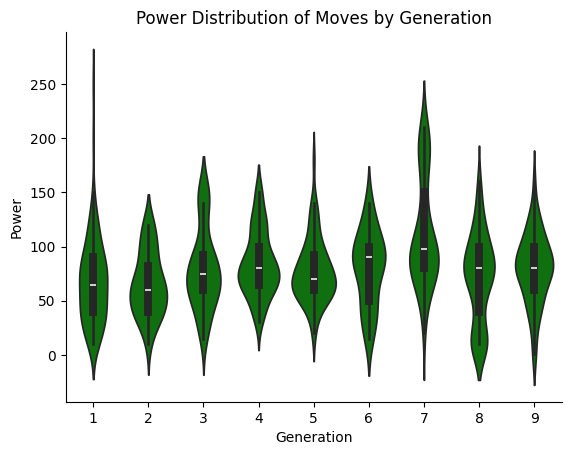

In [101]:
#show the distribution of the power of moves by generation
sns.violinplot(x='generation', y='power', data=Moves_df[Moves_df['power'] > 0], color='green')
plt.title('Power Distribution of Moves by Generation')
plt.xlabel('Generation')
plt.ylabel('Power')
#remove the box around the plot
sns.despine()
plt.show()


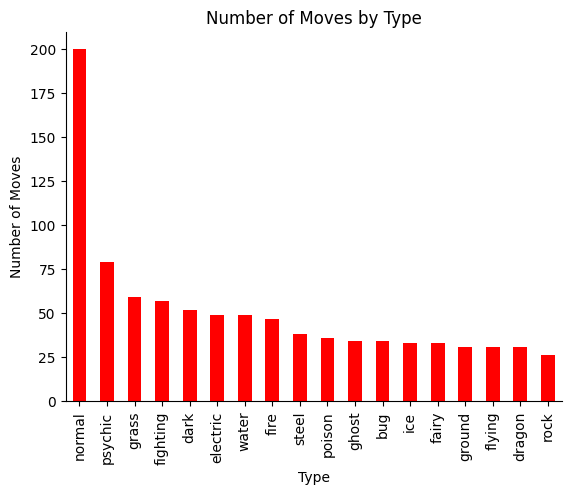

In [102]:
#moves by type
#count the number of moves by type
type_counts = Moves_df['type'].value_counts()
type_counts.plot(kind='bar', color='red')
plt.title('Number of Moves by Type')
plt.xlabel('Type')
plt.ylabel('Number of Moves')
#remove the box around the plot
sns.despine()
plt.show()
